In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [10]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model = Sequential()

# hidden layer
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(3, activation='relu'))

# output layer
model.add(Dense(1, activation='sigmoid'))

c:\Users\7200\AppData\Local\anaconda3\envs\tf\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 172 (688.00 B)

 Trainable params: 172 (688.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7454 - loss: 0.5911
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8046 - loss: 0.4692
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8236 - loss: 0.4219
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8260 - loss: 0.4164
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8304 - loss: 0.4166
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8358 - loss: 0.4025
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8397 - loss: 0.3881
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8452 - loss: 0.3841
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8527 - loss: 0.3693
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8568 - loss: 0.3584
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8597 - loss: 0.3487
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

## Access the Weights and Bias of a particular model

In [18]:
model.layers[0].get_weights()

[array([[-0.0415197 , -0.31154996, -0.07228231,  0.11661512, -0.2542034 ,
         -0.0216317 , -0.02078922,  0.12589777, -0.00872054, -0.08181284,
          0.46403104],
        [-0.8206834 ,  0.36587703, -0.06271691,  0.56051314,  0.11521629,
          0.5479579 ,  0.5353788 , -1.1784168 ,  0.17342691, -0.91264576,
          0.11943049],
        [ 0.17343697, -0.23876128,  0.05723408,  0.24698259, -0.27023295,
          0.20935439, -0.32094333, -0.15318516,  0.28499871, -0.19538143,
         -0.37467203],
        [ 0.10570791, -0.37531948, -0.2258536 , -0.4100339 , -0.02662585,
          0.25020635,  0.1360988 , -0.3270971 ,  0.68720055, -0.5324239 ,
         -0.73818064],
        [ 0.05816129, -0.43286237, -1.60302   ,  0.01313968,  0.7200691 ,
         -0.04086429, -0.28411567, -0.29361954,  1.0775834 , -0.03878982,
         -0.32191768],
        [ 0.01815899, -0.7847808 ,  0.11169486,  0.15352522,  0.2769307 ,
          0.22401603,  0.12986805, -0.11719816, -0.074277  ,  0.6518243

In [19]:
model.get_weights()

[array([[-0.0415197 , -0.31154996, -0.07228231,  0.11661512, -0.2542034 ,
         -0.0216317 , -0.02078922,  0.12589777, -0.00872054, -0.08181284,
          0.46403104],
        [-0.8206834 ,  0.36587703, -0.06271691,  0.56051314,  0.11521629,
          0.5479579 ,  0.5353788 , -1.1784168 ,  0.17342691, -0.91264576,
          0.11943049],
        [ 0.17343697, -0.23876128,  0.05723408,  0.24698259, -0.27023295,
          0.20935439, -0.32094333, -0.15318516,  0.28499871, -0.19538143,
         -0.37467203],
        [ 0.10570791, -0.37531948, -0.2258536 , -0.4100339 , -0.02662585,
          0.25020635,  0.1360988 , -0.3270971 ,  0.68720055, -0.5324239 ,
         -0.73818064],
        [ 0.05816129, -0.43286237, -1.60302   ,  0.01313968,  0.7200691 ,
         -0.04086429, -0.28411567, -0.29361954,  1.0775834 , -0.03878982,
         -0.32191768],
        [ 0.01815899, -0.7847808 ,  0.11169486,  0.15352522,  0.2769307 ,
          0.22401603,  0.12986805, -0.11719816, -0.074277  ,  0.6518243

In [20]:
model.layers

[<Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [21]:
model.layers[1].get_weights()

[array([[ 0.8022805 , -0.96812725, -0.667945  ],
        [ 0.5881602 ,  0.18737806,  0.3165993 ],
        [-0.665492  ,  0.68662095,  0.84477437],
        [ 0.8461644 , -0.07077574,  0.47234324],
        [-0.4924655 ,  0.70689553,  0.47302943],
        [ 0.21767959, -0.14355391, -1.3538443 ],
        [ 0.6888031 ,  0.7156246 , -0.41037375],
        [ 0.10591168, -0.81368905, -0.05206149],
        [-0.507629  ,  0.5387427 ,  0.976344  ],
        [ 0.19535725, -0.9229371 ,  0.22761233],
        [ 0.46199858,  0.21411802,  0.3218335 ]], dtype=float32),
 array([ 0.55011106,  0.36801437, -0.4048382 ], dtype=float32)]

In [22]:
model.save("model.keras")

## Predictions

In [23]:
y_pred_raw = model.predict(X_test_scaled)
y_pred = np.where(y_pred_raw > 0.5, 1, 0)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

## Accuracy

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.844

## Plot curves during training

In [25]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8566 - loss: 0.3373 - val_accuracy: 0.8781 - val_loss: 0.3042
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8698 - loss: 0.3171 - val_accuracy: 0.8800 - val_loss: 0.3056
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8672 - loss: 0.3265 - val_accuracy: 0.8763 - val_loss: 0.3072
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8731 - loss: 0.3200 - val_accuracy: 0.8775 - val_loss: 0.3076
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8651 - loss: 0.3300 - val_accuracy: 0.8788 - val_loss: 0.3084
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8725 - loss: 0.3190 - val_accuracy: 0.8781 - val_loss: 0.3099
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8663 - loss: 0.3269 - val_accuracy: 0.8731 - val_loss: 0.3119
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8643 - loss: 0.3164 - val_accu

In [26]:
history = history.history

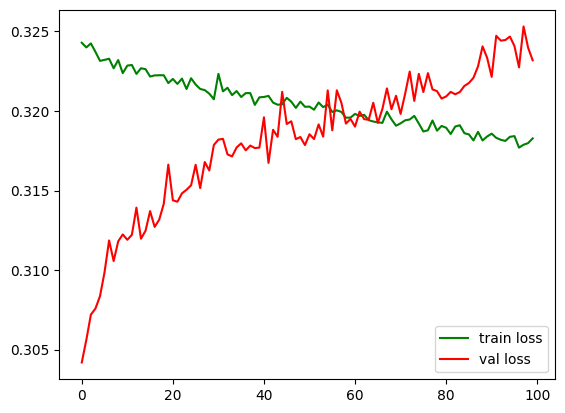

In [31]:
plt.plot(history['loss'], label='train loss', color='green')
plt.plot(history['val_loss'], label='val loss', color='red')
plt.legend()
plt.show()